<a href="https://colab.research.google.com/github/patriciamediavilla/L1P2/blob/main/Copia_de_banco_ufv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 2

##INTRODUCCIÓN

Esta es la segunda práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [ ]:
#Importamos las librerías y la base de datos necesarias

import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import seaborn as sns #
from pandas.core.groupby.ops import DataFrame 

df = pd.read_csv('banco_ufv.csv',sep=';')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos las variables, el tipo de las variables con las que trabajamos... y .head vamos a ver que foram tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 


## Comprensión del negocio y definición del problema.

La sucursal del Banco Santander situada en el campus de la Universidad Francisco de Vitoria nos solicita hacer varios estudios de sus clientes. 

Para ello haremos uso de un dataset proporcionado por la propia sucursal que 
se puede encontrar en Moodle.

En este trabajo vamos a trabjar con los datos proporcionados por esta sucursal, en concreto vamos a: averigual la relación entre el saldo en la cuneta de banco y los estudios que tienen cada una de las personas, después vsmos a ver las edades de los clientes de las sucursal de este banco y por último vamos a ver como de 'fieles' son los clientes con los que cuenta esta sucursal, es decir, cuanto tiempo lleva cada cliente haciendo uso de esta sucursal.

Este tipo de información se suele querer utilizar para estudios estadísticos, y para guardar información.






## Comprensión de los datos

La base de datos que utilizaremos consta de 45211 observaciones

Existen 17 tipos de atributos distintos entre ellos: age, job, marital y muchos más.

Siguiendo las especificaciones dadas, para poder resolver todas las dudas que se nos plantearán solo requeriremos trabajar con los siguientes 4 atributos.

- age (edad)
- education (nivel de educación)
- balance (balance de la cuenta)
- duration (tiempo que llevan como clientes)

Por lo tanto seguiremos adelante solo considerando estos 4 atributos, lo que positivamente afectará nuestra rapidez a la hora de avanzar en la resolución de los problemas planteados.

In [ ]:
#Reducimos nuestra base da datos a las varibales necesarias
df=df[['age','education','balance','duration']]
df.head()

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


## Preparación de los datos

Para poder trabjar con los datos, lo primero que debemos hacer es observar si todos los datos son correctos, si son útiles, ver maneras de normalizarlos para optimizar el algoritmo...

Lo primero que vamos a ver es sie stán completos, es decir si existen NaN en nuestra base de datos.

In [ ]:
age_nan = df['age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable age es:{age_nan}")
education_nan = df['education'].isna().sum()
print(f"La cantidad de NaN que existen en la variable education es:{education_nan}")
balance_nan = df['balance'].isna().sum()
print(f"La cantidad de NaN que existen en la variable balance es:{balance_nan}")
duration_nan = df['duration'].isna().sum()
print(f"La cantidad de NaN que existen en la variable duration es:{duration_nan}")

La cantidad de NaN que existen en la variable age es:0
La cantidad de NaN que existen en la variable education es:0
La cantidad de NaN que existen en la variable balance es:0
La cantidad de NaN que existen en la variable duration es:0


En ninguna de nuestras variables hay datos faltantes, pero vamos a representarlas con un diagrama de cajas para ver si hay outliers y para entender mejro como se distribuyen los datos. ESto lo haremos con las variables: age, balnace y duration ya que eduaction no es una variable numérica y no se puede aplicar este método a esta variable en concreto.

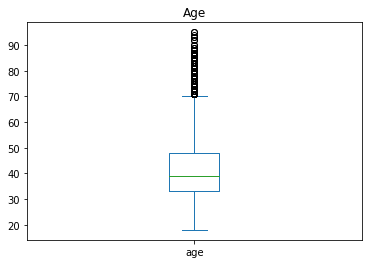

In [ ]:
df['age'].plot(kind='box', title='Age')

Hemos graficado con cajas la variable age(edad) y al observarlo, vemos que hay bastantes datos fuera de rango por arriba, es decir outliers. Sin embargo, vamos a ver si tiene sentido, para ello graficaremos los datos de otra manera para ver si tiene sentido.

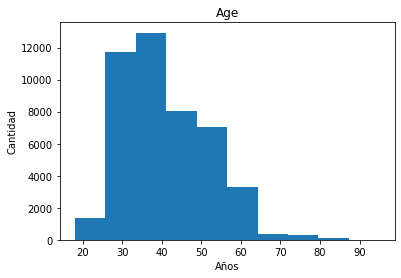

In [ ]:
plt.hist(df['age'])
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.title("Age")
plt.show()

En esta gráfica, vemos que la mayoría de los valores están continidos entre 30 y 50, es decir, la mayoría de la gente que esta asociado a esta sucursal del banco Santander tiene esos años. Vemos que hay algunos más pequeños, podrían ser alumnos de la propia universidad. 

Los valores de más de 65 años, podrían considerarse valores erroneos, sin embargo, esta sucursal no es únicamente de estudiantes y trabajadores de la universidad, al lado de la universidad hay una zona residencial, una urbanización que se llama Monteclaro, pues bien, gente mayor de esta zona puede hacer uso de esta sucursal por comodidad. Por lo que consideramos los outliers correctos y necesarios para el buen trabajo y empleo de los datos en la práctica.

Seguimos ananlizando las demás variables, a continuación, vamos a tratar la variable balance. 

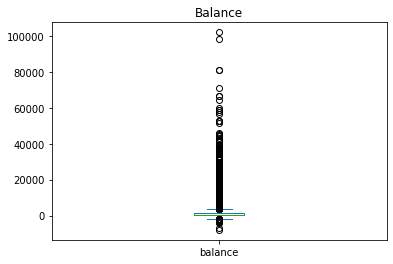

In [ ]:
df['balance'].plot(kind='box', title='Balance')

Hemos graficado con cajas la variable balance (dinero en el banco) y al observarlo, vemos que hay bastantes datos fuera de rango por arriba, y por abajo, es decir, outliers. Sin embargo, vamos a ver si tiene sentido, para ello graficaremos los datos de otra manera.

Haremos uso de un diagrma diferente para ver mejor los datos.

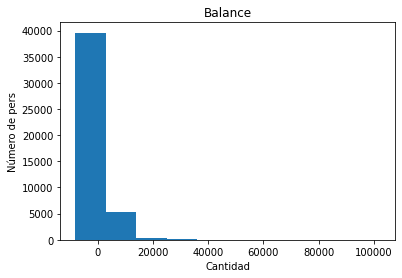

In [ ]:
plt.hist(df['balance'])
plt.xlabel("Cantidad")
plt.ylabel("Número de pers")
plt.title("Balance")
plt.show()

Vemos que la mayoría de clientes de esta sucursal se mueve entre 0 y 10000, en esta variable losdatos en normal que estén muy distanciados en general ya que en un banco, se guarda el dinero desde el rector, ceo, director... que serán los outliers por encima del máximo tanto como los outliers por abajo ya que puede haber gente ne concreto que este en deuda con el banco.

Por todo esto consideramos todos los datos correctos.

A continuación, vamos a analizar la varible Duration que es la cantidad de días que lleva una persona en la empresa.

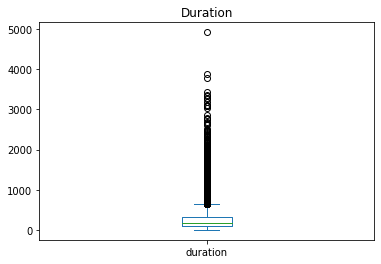

In [ ]:
df['duration'].plot(kind='box', title='Duration')

Hemos graficado con cajas la variable Duration (tiempor en días que lleva un cliente) y al observarlo, vemos que hay bastantes datos fuera de rango por arriba, es decir outliers. Sin embargo, vamos a ver si tiene sentido, para ello graficaremos los datos de otra manera, usaremos otro diagrama.

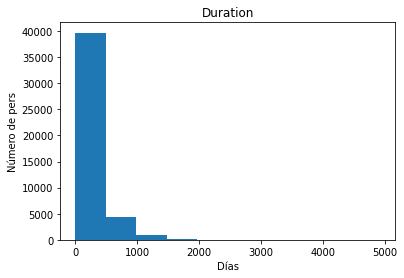

In [ ]:
plt.hist(df['duration'])
plt.xlabel("Días")
plt.ylabel("Número de pers")
plt.title("Duration")
plt.show()

Al observar este gráfico, vemos que tiene sentido que la gráfica sea a partir de 0, porque una persona no puede ser cliente de -5 dias por ejemplo, si se diera este caso tendríamos que ver como lidiar con ese problema.

Sin embargo, los outliers por encima del máximo son normales, ya que puede haber personas que lleven mucho más tiempo que otras, y que la mayoría se hayan unido a esta sucursal hace relativamente poco, igual por un anuncio, una campaña...

Por lo que decidimos dejar esta varaible así también.

La variable de educación es categórica, por lo que usaremos otro tipo de diagramas para ver más claramente lo que nos esta explicando esta variable.

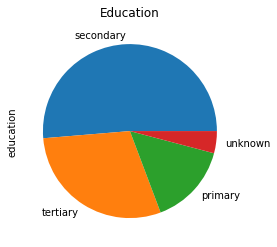

In [ ]:
df['education'].value_counts().plot(kind='pie', title='Education')

Al observar esta gráfica, además de ver las probabilidades de cada tipo de educación también observamos que no se se sabe la educaión que tiene una parte de nuestra base de datos, ahora vamos a estudiar cuál es ese porcentaje.

In [ ]:
df['education'].value_counts()


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Ahora, sabemosa parte de los niveles, cuales son las cantidades que están dentro de cada uno de los niveles:


1.   Primaria = 6851   
2.   Secundaria = 23202   
3.   Terciaria = 13301    
4.   Desconocida = 1857

###Cómo lidiar con datos faltantes

Según el proceso CRISP-DM (Cross-Industry Standard Process for Data Mining), las opciones para lidiar con datos faltantes en bases de datos son las siguientes:
1.	Eliminación: Eliminar las filas o columnas con datos faltantes.
2.	Imputación: Reemplazar los valores faltantes con valores estimados o calculados. Por ejemplo, la imputación media o mediana puede ser utilizada para reemplazar los valores faltantes en una columna con el valor promedio o mediana de esa columna.
3.	Interpolación: Interpolar los valores faltantes utilizando una técnica de estimación, como la interpolación lineal o spline.
4.	Modelos predictivos: Utilizar modelos predictivos para estimar los valores faltantes a partir de los datos disponibles.
5.	Algoritmos de aprendizaje no supervisado: Utilizar algoritmos de clustering o de reducción de dimensionalidad para identificar patrones en los datos y utilizarlos para estimar los valores faltantes.
Es importante elegir la técnica adecuada para lidiar con los datos faltantes, considerando el tipo de datos, la cantidad de datos faltantes y su impacto en los resultados de análisis. Es recomendable investigar y evaluar varias opciones antes de tomar una decisión.



Ahora, tenemos que decidir cómo vamos a gestionar aquellos clientes cuyo nivel de educación es desconocido. 

Debido a que nuestro primer problema trata de ilustrar la correlación entre el nivel de educación y el dinero que tienen, es importante que hagamos algo con ellos en mente.

Desconocemos la razón por la cual esta infomación es desconocida, agravado por el hecho de desconocer el criterio usado para agrupar a la gente en dichos niveles. 

¿Tendrán un nivel de educación inferior al requerido para poder haber obtenido el nivel primario? Tal vez no querían divulgar dicha información...



Existen varias opciones respecto a como lidiar con NaN.
Una opción sería ver si podríamos eliminar aquellos clientes con nivel de educación desconocida.

In [ ]:
df['education'].value_counts().sum()

45211

In [ ]:
print("Porcentage de todos los clientes con nivel de educación desconocido: {:.2f}%".format((1857/45211)*100))

Porcentage de todos los clientes con nivel de educación desconocido: 4.11%


Antes de ver cómo proceder, analizalizaremos cómo están distribuidos los datos de aquellos clientes cuyo nivel de educación es desconocido. La razón por ello, es que si todos aquellos clientes tuviesen una cantidad de dinero que aportase información importante, fuese por su alto o bajo valor, tendríamos que encontrar una forma alternativa de tratar con ellos.

Finalmente, hemos decidimos eliminar los valores ya que el porcentaje es batante bajo, además considerando la cantidad de datos que tenemos podemos eliminarlas. También a favor de nuestar decisión cabe decir que no nos podemos inventar los estudios de una persona, no sabemos cual es el motivo de no saberlo.

Según iremos avanzando, trabajaremos de aquí a lante con esta misma base de datos. Hablando en términos prácticos con visión al mundo real, es más eficiente tener una misma base de datos dese la que trabajar para resolver cualquier tipo de duda. 

Es por ello que en el contexto particular de este ejercicio, hemos determinado que no supondrá ningún tipo de impedimento usar esta base de datos para el resto de ejercicios.

In [ ]:
df = df.drop(df[df['education']=='unknown'].index)
df.reset_index(inplace=True, drop=True)

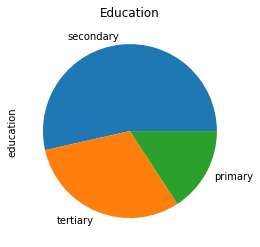

In [ ]:
df['education'].value_counts().plot(kind='pie', title='Education')

Como observamos en la gráfica ya no tenemos observaciones en las que no sepamos las educaión de una persona.

#EJERCICIO 1



##Modelado



**¿Está el *nivel de estudios* directamente relacionado con el *saldo de cada cliente en la cuenta*?**

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [ ]:
conditions = [
    df['balance'] < 0,
    df['balance'] > 10000,
    df['balance'] >= 0
]

choices = [
    'Endeudados',
    'Potencial Paquete Inversion',
    'Balance Positivo'
]

df['balance category'] = np.select(conditions, choices)

In [ ]:
print(df['balance category'])


0        Balance Positivo
1        Balance Positivo
2        Balance Positivo
3        Balance Positivo
4        Balance Positivo
               ...       
43349    Balance Positivo
43350    Balance Positivo
43351    Balance Positivo
43352    Balance Positivo
43353    Balance Positivo
Name: balance category, Length: 43354, dtype: object


Ya sabemos que tendremos que agrupar a los clientes en 3 rangos numéricos según el dinero que actualmente tengan en su cuenta de banco, pero previo a visualizar los datos, 

In [ ]:
df.head()

,age,education,balance,duration,balance category
0,58,tertiary,2143,261,Balance Positivo
1,44,secondary,29,151,Balance Positivo
2,33,secondary,2,76,Balance Positivo
3,35,tertiary,231,139,Balance Positivo
4,28,tertiary,447,217,Balance Positivo


In [ ]:
df['balance category'].value_counts()

Balance Positivo               38927
Endeudados                      3638
Potencial Paquete Inversion      789
Name: balance category, dtype: int64

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
grouped = df.groupby(['education','balance'])

In [ ]:
# Agrupamos por las columnas 'education' y 'balance_category'
grouped = df.groupby(['education', 'balance category']).size().reset_index(name='count')

# Creamos una tabla pivote con las columnas 'education' y 'balance_category'
# y los valores de la columna 'count'
table1 = pd.pivot_table(grouped, values='count', index=['education'], columns=['balance category'])

# Imprimimos la tabla
print(table1)

balance category  Balance Positivo  Endeudados  Potencial Paquete Inversion
education                                                                  
primary                       6160         607                           84
secondary                    20590        2311                          301
tertiary                     12177         720                          404


Con esta tabla logramos visualizar, previo a una gráfica, cierta información que necesitamos conocer. Nos muestra el número de clientes que pertenece a cada grupo.

Analicémosla con detenimiento para comprender bien la información que aparece y si hay algún dato que nos pueda sorprender.

Empecemos por los daros tal vez más esperados.

El mayor número de personas que poseen más de 10.000€ en sus cuentas y por lo tanto pueden ser considerados para el paquete de inversiones son personas con el nivel de educación más alto, y el grupo de personas más pequeño lo componen aquellos con un nivel de educación primaria.

Se puede considerar interesante el hecho que el mayor número de personas endeudadas, o con la cuenta en negativo, provienen de aquellos con nivel de educación secundaria y con un margen muy grande. Un 63.5% de todas las personas endeudadas exactamente. Seguidos después por aquellos con un nivel de educación terciario y en último lugar aquellos con un nivel de educación primaria. Es cierto que aunque el menor número de personas endeudadas provengan del nivel educativo primario, en general son el grupo menos numeroso. Porcentualmente hablando, el número de personas endeudadas es mayor en dicho grupo que en el de aquellos individuos con nivel de educación secundaria.


Seguiremos analizando una vez obtengamos la gráfica.




###**¿Qué diagrama has usado y por qué?**




####**Gráfica de barras adyacentes**



Optamos por un gráfico de barras adyacentes para representar esta información por una serie de ventajas que presentaba.

Las ventajas de utilizar una gráfica de barras adyacentes para explicar la relación entre el nivel de estudios y el saldo de los clientes en la cuenta incluyen:

*   **Visualización clara:** Las gráficas de barras adyacentes son fáciles de leer y comprender, lo que permite a los lectores ver de manera clara la relación entre dos variables.
*   **Comparación fácil:** Con una gráfica de barras adyacentes, es fácil comparar los valores de dos categorías y ver si existe una correlación entre ellas.
*   **Representación gráfica:** Las gráficas de barras adyacentes pueden utilizarse para representar de manera gráfica datos numéricos y hacer que la información sea más accesible para los lectores.

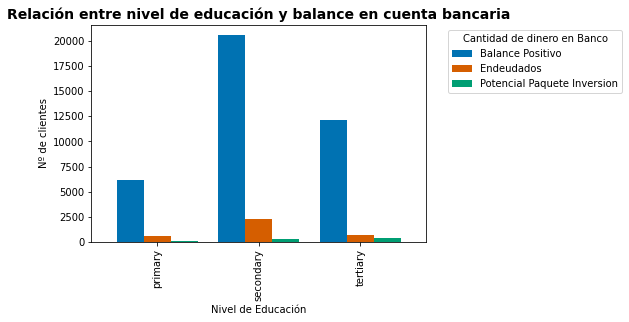

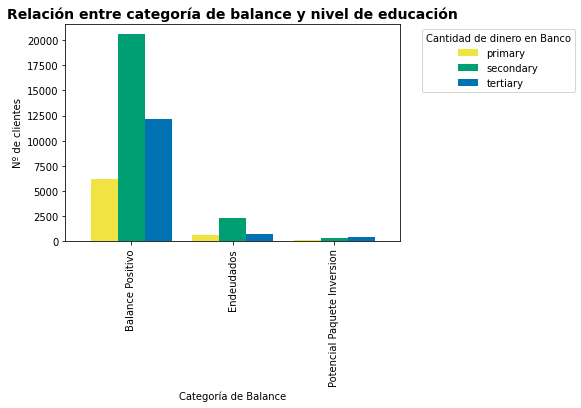

In [ ]:
# Agrupamos por las columnas 'education' y 'balance category'
grouped = df.groupby(['education', 'balance category']).size().reset_index(name='count')

# Creamos una tabla pivote con las columnas 'education' y 'balance_category'
# y los valores de la columna 'count'
table = pd.pivot_table(grouped, values='count', index=['education'], columns=['balance category'])

# Creamos la gráfica de barras adyacentes con colores personalizados
ax = table.plot(kind='bar', width=0.8, color=['#0072B2', '#D55E00', '#009E73'])

# Agregamos leyendas y títulos
ax.legend(title='Cantidad de dinero en Banco', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Nivel de Educación')
ax.set_ylabel('Nº de clientes')
ax.set_title('Relación entre nivel de educación y balance en cuenta bancaria', fontweight='bold', fontsize=14)

# Mostramos la gráfica
plt.show()

# Agrupamos por las columnas 'balance category' y 'education'
grouped = df.groupby(['balance category', 'education']).size().reset_index(name='count')

# Creamos una tabla pivote con las columnas 'balance category' y 'education'
# y los valores de la columna 'count'
table = pd.pivot_table(grouped, values='count', index=['balance category'], columns=['education'])

# Creamos la gráfica de barras adyacentes con colores personalizados
ax = table.plot(kind='bar', width=0.8, color=['#F0E442', '#009E73', '#0072B2'])

# Agregamos leyendas y títulos
ax.legend(title='Cantidad de dinero en Banco', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Categoría de Balance')
ax.set_ylabel('Nº de clientes')
ax.set_title('Relación entre categoría de balance y nivel de educación', fontweight='bold', fontsize=14)

# Mostramos la gráfica
plt.show()

##Evaluación

Como podemos apreciar, la decisión respecto a que variable será representada en el eje x ( Nivel de educación o Saldo del cliente en la cuenta) y cual por los tres diferentes colores, es muy importante puesto las deducciones que podramos sacar visualizando las gráficas de barras adyacentes podrían ser diferentes.

De la Gráfica [1], lo más inminente que podemos apreciar, es cómo los tres bloques de educación siguen un patrón casi idéntico, muy similar. La popularidad y distribución del saldo los clientes sigue el mismo orden sin importar el nivel de educación de los mismos; la mayoría tiene un saldo positivo, seguido por aquellos que tienen la cuenta en negativo y en último lugar aquellos con más de 10.000€.

También tenemos que apreciar cómo de grande es el salto entre aquellos que tienen un balance positivo vs el resto, es muy notable.

La Gráfica [2], nos permite visualizar mejor este último dato. Vemos más drásticamente tal vez, la diferencia de personas que existen entre aquellos que tienen un balance positivo y el resto de personas. Podemos comprender la verdadera magnitud de los pocos clientes a los que se les puede ofrecer el paquete de inversión. 

Éste tipo de gráficas le puede servir a la sucursal del banco para tomar decisiones, por ejemplo respecto a la cantidad de empleados que necesitan contratar para conversar con aquellos clientes más adinerados sobre un paquete premium.

Si bien ésta gráfica es útil porque representa de una forma muy buena la cantidad de personas que caen bajo según qué rango, tal vez no es la mejor para ayudarnos a conceptualizar el porcentaje de personas que caen bajo cada rango y la relación entre el nivel de educación y el saldo del cliente en su cuenta. Es por ello que con los datos crearemos más gráficas diferentes para conseguir una mejor visión global de esta relación.


El color es una herramienta poderosa para comunicar información y evocar emociones. Cada color tiene una connotación que puede afectar la forma en que una persona percibe la información presentada en un gráfico.

Es por ello, que por ejemplo el rojo que se asocia comúnmente con el peligro, lo usamos para aquellos que están endeudados.

####**Pie Chart**

En general, un pie chart no es la forma más efectiva de analizar la relación entre dos variables, ya que se trata de una gráfica que muestra la distribución de una sola variable en relación al total. Pero, sí puede aportar información importante sobre la distribución de una variable categórica en una población. Esta información nos será muy útil para poder contestar la pregunta que resolveremos más adelante respecto a *qué grupo resalta más*.

En el caso de la relación entre el nivel de educación de los clientes de un banco y la cantidad de dinero que tienen, un pie chart mostrará de manera clara y visual la proporción de clientes que se encuentran en cada uno de los tres rangos de cantidad de dinero para cada nivel de educación. Esto permitiría hacer comparaciones rápidas entre los distintos niveles de educación y ver si hay alguna tendencia clara en la distribución de la cantidad de dinero entre ellos.


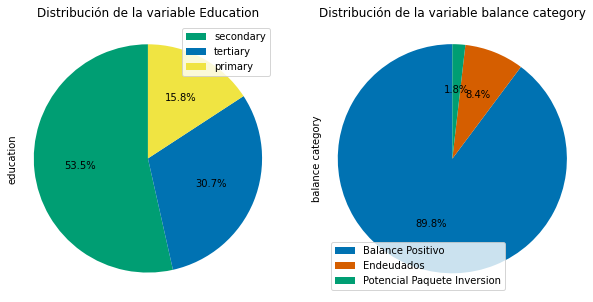

In [ ]:
# Datos del primer gráfico de pie
counts1 = df['education'].value_counts()
colors1 = ['#009E73', '#0072B2', '#F0E442']

# Datos del segundo gráfico de pie
counts2 = df['balance category'].value_counts()
colors2 = ['#0072B2', '#D55E00', '#009E73']

# Crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Crear primer gráfico de pie en el primer subplot
counts1.plot(kind='pie', y='education', colors=colors1,
             autopct='%1.1f%%', startangle=90, labels=None, ax=axs[0])
axs[0].legend(labels=counts1.index, loc='best')
axs[0].set_title('Distribución de la variable Education')
axs[0].axis('equal')

# Crear segundo gráfico de pie en el segundo subplot
counts2.plot(kind='pie', y='balance category', colors=colors2, 
             autopct='%1.1f%%', startangle=90, labels=None, ax=axs[1])
axs[1].legend(labels=counts2.index, loc='best')
axs[1].set_title('Distribución de la variable balance category')
axs[1].axis('equal')

# Mostrar la figura
plt.show()


##Evaluación

Aquí visualizamos de una forma muy efectiva la distribución en porcentaje de cómo se distribuyen las distintas categorías de clientes, poseyendo más de la mitad de los clientes una educación secundaria, algo más de una cuarta parte una educación terciaria, y un 15% una educación primaria.

Más impactante aún es verdaderamente apreciar lo preciados que son aquellos clientes con más de 10.000€ en la cuenta, pues tan solo un 1.8% de los clientes de este banco lo tienen. Positivamente, casi un 90% de los clientes tienen un saldo positivo en cuenta.

Analicemos a continuación la relación entre ambas variables.

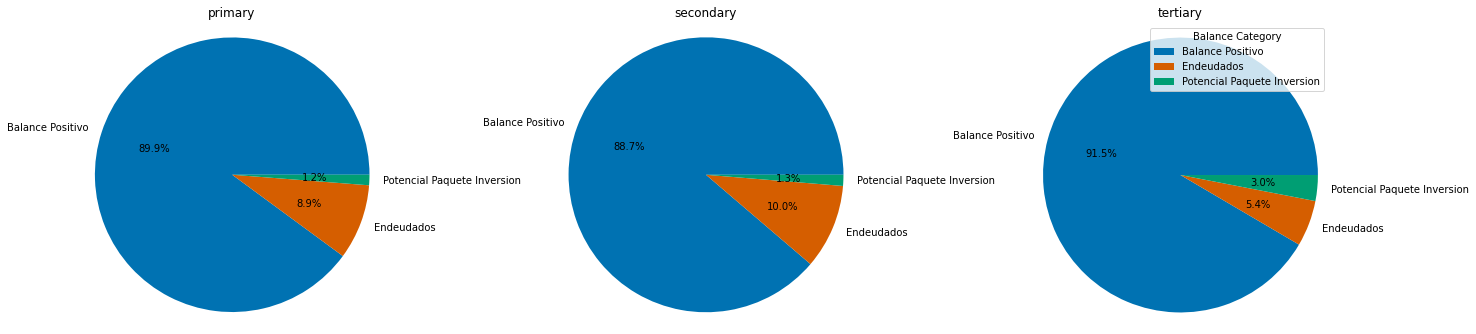

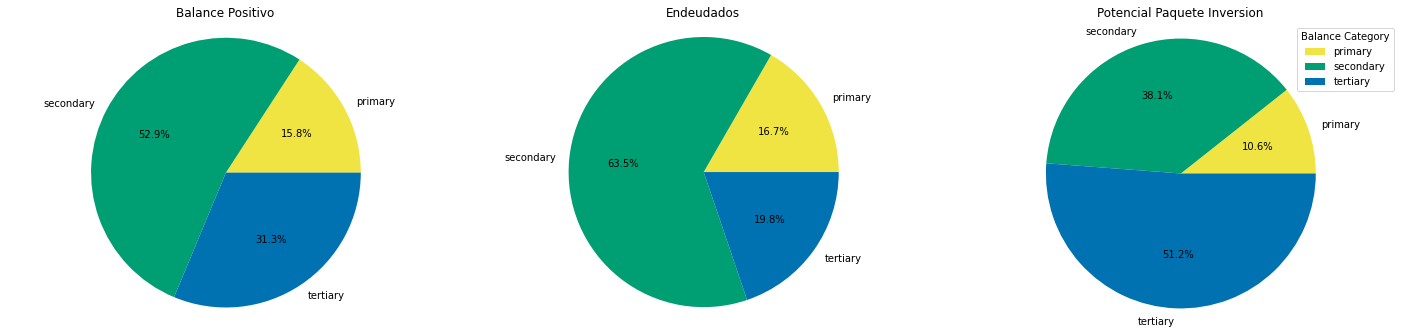

In [ ]:
# Cargar los datos y crear la tabla pivote
table = pd.pivot_table(grouped, values='count', index=['balance category'], columns=['education'])

# Graficar la tabla pivote como tres gráficos de pie
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

colors = ['#0072B2', '#D55E00', '#009E73']

# Iterar sobre cada subtrama y crear un gráfico de tipo pie
for i, ax in enumerate(axs):
    ax.pie(table[table.columns[i]], labels=table.index, colors=colors, autopct='%1.1f%%')
    ax.set_title(table.columns[i])
    ax.set_ylabel('')
    ax.axis('equal')

# Crear la leyenda
legend = plt.legend(table.index, title='Balance Category', loc='upper right')

# Ajustar el espacio entre los gráficos y mostrarlos
plt.tight_layout(pad=2)
plt.show()


# Cargar los datos y crear la tabla pivote
table = pd.pivot_table(grouped, values='count', index=['education'], columns=['balance category'])

# Graficar la tabla pivote como tres gráficos de pie
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
colors = ['#F0E442', '#009E73', '#0072B2']


# Iterar sobre cada subtrama y crear un gráfico de tipo pie
for i, ax in enumerate(axs):
    ax.pie(table[table.columns[i]], labels=table.index, colors=colors, autopct='%1.1f%%')
    ax.set_title(table.columns[i])
    ax.set_ylabel('')
    ax.axis('equal')

# Crear la leyenda
legend = plt.legend(table.index, title='Balance Category', loc='best')

# Ajustar el espacio entre los gráficos y mostrarlos
plt.tight_layout(pad=2)
plt.show()





##Evaluación

Con estos pie chart, apreciamos la importancia que tiene el escoger cuál va a ser nuestra **"variable categórica"** (que se utiliza para representar información mediante colores en un pie chart). 

En el primer set de pie charts donde la variable categórica es el rango de dinero en la cuenta bancaría, a primera vista puede parecer un gráfico insignificante puesto que todos los rangos salariales tienen un porcentaje muy similar, según cada nivel de educación del cliente. 

Sin embargo, aquellos que tienen un nivel de educación terciaria, se distinguen de los demás puesto que la cantidad de clientes los cuales pueden ser considerados para un paquete de inversión, es más del doble que el resto. Una diferencia de un 1.7/1.8 porcentualmente hablando puede no parecer como mucho pero cuando estamos hablando de decenas de miles de clientes, estamos tratando con mucha más gente con más de 10.000€. También poseen el porciento más bajo de clientes endeudados, un 50% menos que en el nivel educativo secundario de hecho, otro dato muy importante para los bancos.

En el segundo set de pie charts, donde la variable categórica es el nivel educativo, apreciamos como más del 50% de clientes con más de 10.000€ poseen un nivel de educación terciaria, lo que es muy positivo considerando que componen tan solo un 30% de todos los clientes del banco. Como apreciamos anteriormente, aquellos con nivel de educación secundaria, son los responsables del mayor porcentaje de deuda. Aunque, hemos de ser críticos y valorar que a pesar de que porcentualmente hablando sean responsables de la mayor cantidad de deuda, como hemos dividido el dinero de la cuenta en rangos, cabe la posibilidad de la suma de la deuda de otro grupo sea superior en cuanto a cantidad en €, que aquellos con nivel educativo secundario. Es información que exploraremos a continuación con un boxplot.

####**Box Plot**

Realizar tres boxplots es útil en este caso porque nos permite comparar visualmente la distribución de la cantidad de dinero en el banco según el nivel de educación. Cada boxplot representa la distribución de datos para un grupo específico, en este caso, los clientes agrupados según su nivel de educación. Al comparar los boxplots, podemos ver fácilmente si hay alguna diferencia en la distribución de datos entre los diferentes grupos.

Text(0, 0.5, 'Balance')

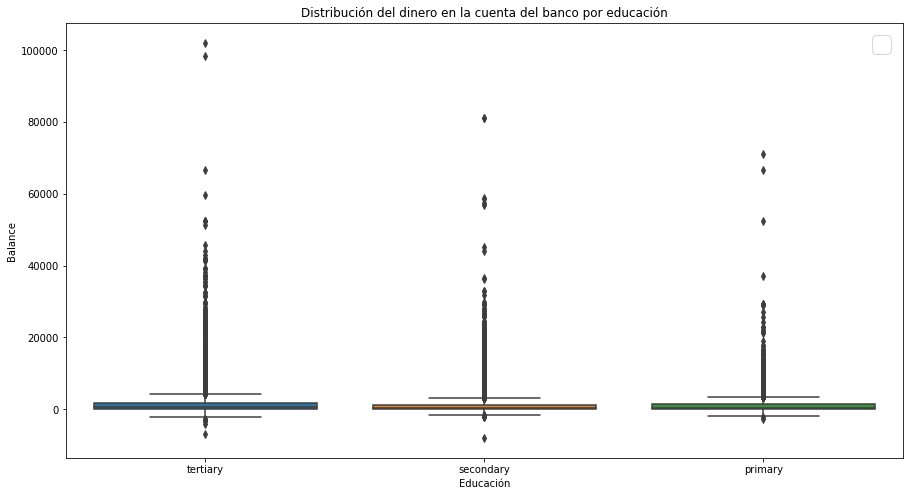

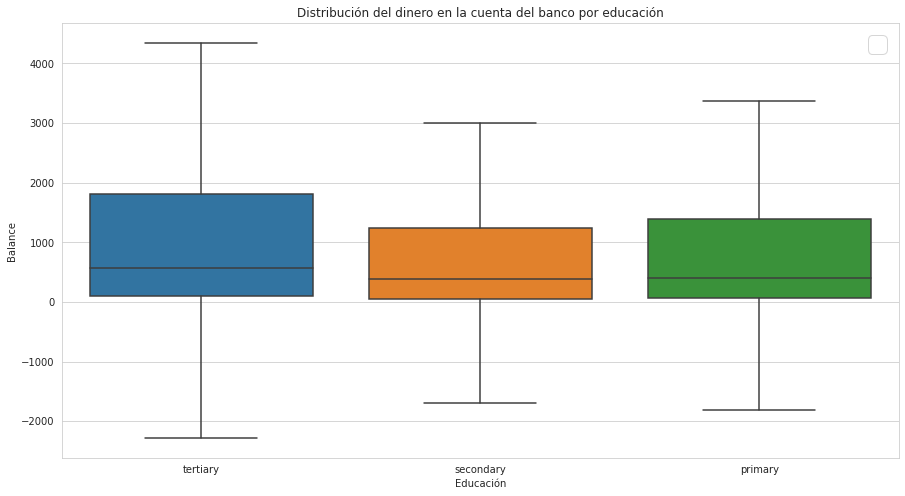

In [ ]:
titulo = f"Distribución del dinero en la cuenta del banco por educación"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')

# Crear el DataFrame con la información necesaria
data = df[['education', 'balance']]

# Crear los boxplots
sns.boxplot(x='education', y='balance', data=data)
ax.legend(fontsize=24)

# Agregar título y etiquetas de los ejes
plt.title('Distribución del dinero en la cuenta del banco por educación')
plt.xlabel('Educación')
plt.ylabel('Balance')



titulo = f"Distribución del dinero en la cuenta del banco por educación"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')

# Crear el DataFrame con la información necesaria
data = df[['education', 'balance']]


# Crear los boxplots
sns.boxplot(x='education', y='balance', data=data, showfliers=False)
ax.legend(fontsize=24)

# Agregar título y etiquetas de los ejes
plt.title('Distribución del dinero en la cuenta del banco por educación')
plt.xlabel('Educación')
plt.ylabel('Balance')


##Evaluación

El primer boxplot, mostraba tantos 'outliers' que dificultaba la comprensión de la gráfica. Esta dificultad es apaciguada por el hecho que la mayoría de 'outliers' depictan una cantidad de dinero importante, pero los analizaremos más adelante por separado. 

Eliminar los outliers puede ser una buena idea porque estos valores dificultan  la comparación entre los grupos. Por ejemplo, si un cliente tiene una cantidad de dinero muy grande en el banco, esto puede hacer que los otros datos parezcan insignificantes y hacer que sea difícil ver cualquier diferencia real entre los diferentes grupos.

Previo a ignorarlos, apreciamos como los clientes con nivel educativo terciario destacan por tener más clientes con más dinero que el resto.

In [ ]:
titulo = f"Distribución del dinero en la cuenta del banco por educación"
color = sns.color_palette('Set2',8)

# Crear el DataFrame con la información necesaria
data = df[['education', 'balance']]

# Crear los boxplots
#sns.boxplot(x='education', y='balance', data=data, showfliers=False)

# Obtener los valores de la mediana, la longitud de la caja y los bigotes
medians = data.groupby(['education'])['balance'].median()
box_lengths = data.groupby(['education'])['balance'].quantile(0.75) - data.groupby(['education'])['balance'].quantile(0.25)
whiskers_min = data.groupby(['education'])['balance'].quantile(0.25) - 1.5*box_lengths
whiskers_max = data.groupby(['education'])['balance'].quantile(0.75) + 1.5*box_lengths

# Calcular la simetría y la forma de la distribución de los datos
skewness = data.groupby(['education'])['balance'].skew()
kurtosis = data.groupby(['education'])['balance'].apply(lambda x: np.mean((x-x.mean())**4)/x.std()**4)

# Crear dataframes para mostrar la información en tablas
medians_df = pd.DataFrame({'Mediana': medians}).sort_values(by='Mediana')
box_lengths_df = pd.DataFrame({'Longitud de la caja': box_lengths}).sort_values(by='Longitud de la caja')
whiskers_df = pd.DataFrame({'Bigote inferior': whiskers_min, 'Bigote superior': whiskers_max}).sort_values(by=['Bigote inferior', 'Bigote superior'])
skewness_df = pd.DataFrame({'Simetría': skewness}).sort_values(by='Simetría')
kurtosis_df = pd.DataFrame({'Forma de la distribución': kurtosis}).sort_values(by='Forma de la distribución')


Para sacar conclusiones a partir de boxplots, es importante prestar atención a las siguientes características:



#####**1. La posición de la mediana**

In [ ]:
print('Posición de la mediana:\n', medians_df)

Posición de la mediana:
            Mediana
education         
secondary    392.0
primary      403.0
tertiary     577.0


Los clientes con educación terciaria tienen una mediana significativamente mayor que los clientes con educación primaria o secundaria. Esto sugiere que hay una relación positiva entre el nivel de educación y la cantidad de dinero que los clientes tienen en sus cuentas bancarias, y que los clientes con educación terciaria tienen más probabilidades de tener un saldo más alto en sus cuentas bancarias

#####**2. La longitud de la caja**

In [ ]:
print('\nLongitud de la caja:\n', box_lengths_df)


Longitud de la caja:
            Longitud de la caja
education                     
secondary               1179.0
primary                 1329.0
tertiary                1700.0


La longitud de la caja, que indica la variabilidad de los datos, e indica la distancia entre el primer y tercer cuartil, es mayor para los clientes con educación terciaria en comparación con los clientes con educación primaria o secundaria. Esto sugiere que la cantidad de dinero en las cuentas bancarias de los clientes con educación terciaria varía más ampliamente que los clientes con educación primaria o secundaria.

#####**3. Los bigotes**

In [ ]:
print('\nBigotes por educación:\n', whiskers_df)


Bigotes por educación:
            Bigote inferior  Bigote superior
education                                  
tertiary           -2446.0           4354.0
primary            -1932.5           3383.5
secondary          -1713.5           3002.5


Los bigotes inferior y superior para cada nivel de educación sugieren que hay valores atípicos (outliers) para todos los niveles, pero especialmente para los clientes con educación terciaria. Esto indica que hay algunos clientes con saldos bancarios extremadamente altos o bajos en comparación con la mayoría de los clientes.

Los bigotes inferior y superior, que representan los valores extremos de los datos, también varían según el nivel de educación. Los clientes con educación terciaria tienen los valores extremos más alejados de la mediana, mientras que los clientes con educación secundaria tienen los valores extremos más cercanos a la mediana.

#####**4. La simetría y la forma de la distribución de los datos**

In [ ]:
print('\nSimetría por educación:\n', skewness_df)
print('\nForma de la distribución por educación:\n', kurtosis_df)


Simetría por educación:
            Simetría
education          
tertiary   7.430837
secondary  8.534804
primary    8.849834

Forma de la distribución por educación:
            Forma de la distribución
education                          
tertiary                 109.361648
secondary                158.613067
primary                  160.837292


**Simetría**

La simetría indica que la distribución de los datos es asimétrica positiva para todos los niveles de educación. Esto sugiere que la mayoría de los clientes tienen saldos más bajos en sus cuentas bancarias, mientras que hay algunos clientes con saldos muy altos.

Los clientes con educación terciaria son los más simétricos y los clientes con educación secundaria siendo los menos simétricos. Esto sugiere que la distribución de la cantidad de dinero en las cuentas bancarias de los clientes con educación terciaria es más equilibrada que la distribución de los clientes con educación secundaria.

**Distribución**

La forma de la distribución, medida por la kurtosis, es más aguda para los clientes con educación primaria o secundaria en comparación con los clientes con educación terciaria. Esto sugiere que los clientes con educación primaria o secundaria tienen una distribución más puntiaguda en torno a la mediana, lo que indica una mayor concentración de valores cerca de la mediana.


##Despliegue



En conclusión, la información que nos proporcionas sugiere que el nivel de educación está relacionado positivamente con la cantidad de dinero que los clientes tienen en sus cuentas bancarias. Además, hay diferencias en la variabilidad, los valores extremos, la simetría y la forma de la distribución de los datos según el nivel de educación. Por lo tanto, el nivel de educación es una variable importante a considerar al analizar los datos de los clientes de un banco.

####**¿Cuál es el grupo que más destaca?**

Basándonos en toda la información sonsacada, podemos decir que el grupo que más destaca es el de clientes con educación terciaria, ya que tienen la mediana más alta y la longitud de la caja más amplia, lo que indica que tienen una mayor cantidad de dinero en sus cuentas bancarias en comparación con los otros dos grupos.

Además, aunque los valores extremos en el grupo de clientes con educación terciaria son muy amplios, esto también sugiere que hay una gran variabilidad en la cantidad de dinero que algunos clientes con educación terciaria tienen en sus cuentas bancarias, lo que podría ser una oportunidad para que el banco ofrezca servicios personalizados y adaptados a las necesidades de cada cliente.

Por otro lado, el grupo de clientes con educación primaria es el que tiene la mediana más baja y la longitud de la caja más estrecha, lo que sugiere que tienen una cantidad más limitada de dinero en sus cuentas bancarias en comparación con los otros dos grupos.

El banco podría utilizar esta información para orientar su estrategia de marketing y ofrecer servicios y productos específicos a cada grupo de clientes. Por ejemplo, el banco podría enfocarse en ofrecer servicios de inversión y de ahorro a los clientes con educación terciaria que tienen una mayor cantidad de dinero en sus cuentas bancarias, mientras que podría enfocarse en ofrecer préstamos y otros servicios bancarios a los clientes con educación primaria que tienen una cantidad más limitada de dinero en sus cuentas.


#EJERCICIO 2

##Modelado

Ahora, vamos a aplicar el siguiente paso de la metodología CRISP.

En este ejercicio nos piden que dividamos las edades, es decir que pase de ser una variable númerica a que sea una variable categórica. En concreto nosotros vamosa hacer la división de esta manera: los menores de 30 años van a ser alumnos, de 30 a 45 años serán trabajadores jóvenes, de 46 a 65 trabajadores veteranos, y por último los trabajdores no vinculados a la universidad. 

¿Cuál es el grupo de edad que tiene más clientes?

Por lo que vamos a empezar el modelado de los datos para esteejercicio. Vamos a dividir las edades en las categorías indicadas, para ello vamos a crear un atributo nuevo en donde guardaremos esta nueva información. 

Categorizar una variable, se suele pedir cuando una variable es continua pero los valores cercanos se pueden poner en el mismo grupo, como puede ser la edad en este caso.


In [ ]:
#Creamos unas nueva columna en la que vamos a añadir la categoría de las edades
df["agecat"] = np.nan
#Establecemos las diferentes clases que queremos crear.
filas=len(df.axes[0])
for i in range (filas):
    if df['age'][i]<30:
        df['agecat'][i]='Alumnos'
    elif df['age'][i]>=30 and df['age'][i]<=45:
        df['agecat'][i]='Trabajadores jóvenes'
    elif df['age'][i]>=46 and df['age'][i]<=65:
        df['agecat'][i]='Trabajadores veteranos'
    else:
        df['agecat'][i]='Cliente no vinvulado'


<ipython-input-33-206ae5670e3e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['agecat'][i]='Trabajadores veteranos'
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Una vez transformada la variable vamos a compar cuantos tipo de cada hay.

In [ ]:
df['agecat'].value_counts()

Trabajadores jóvenes      24702
Trabajadores veteranos    12908
Alumnos                    5070
Cliente no vinvulado        674
Name: agecat, dtype: int64

Ahora, además de saber cuales son las categorías que hemos creado, sabemos cuantas observaciones pertenercen a cada categoría.

- Alumnos: 5273
- Trabajadores jóvenes: 25490
- Trabajadores veteranos: 13697
- Cliente no vinculado: 751

Al visualizar estos datos se nos hace raro pensar que en un banco situado dentro de la universidad donde la mayoría de las personas que pasan por delente sean alumnos, que sea la segunda categoría con menos frecuencia. Pero puede ser perfectamente que la gente de la zona utilice esta sucursal del banco para llevar sus cuentas.

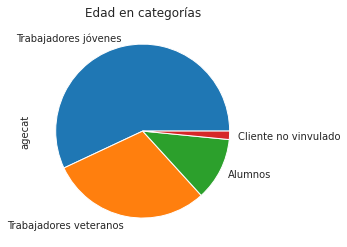

In [ ]:
df['agecat'].value_counts().plot(kind='pie', title='Edad en categorías')

##Evaluación

Observamos que la mayoría de los clientes son trabajadores jóvenes, con bastante diferencia, más del 50% se encuentran en esta categoría. Seguida de trabajadores veteranos, con un 30% de la cantidad total, seguido de alumnos que es la segunda categoría con menos clientes, y por último los clientes no vinculados, que hemos concluido que son las personas más mayores que viven cerca de la universidad y que por eso les viene bien ser clientes de esta sucursal.



##Despliegue

El despliegue en esta sucursal del banci podríamos usar este tipo de datos para, sabiendo cuál es la categoría que más freceunta nuestra sede, pues hacer anuncios orientado a esas edades que son más frecuentes porque sabemos que son a los que más les interesa.

Este tipo de estudios sirve para conocer tu sucusal y así adapsarse en función de nuestros datos.

#EJERCICIO 3


##Modelado

En este ejercicio lo que queremos hacer es ver la duración de los clientes del banco Santander en la sucursal de la UFV. Para eso lo que vamos a hacer es pasar los días a años y una vez en año vamos a graficarlo para ver que tipo de clientes son los que tiene esta sucursal.

Es decir, en este ejercicio en concreto solo tenemos que modelar los datos creando otra nueva variable y dividiendo a duration entre los días de un año, para tener los años que cada cliente lleva siendo cliente del banco Santander.



In [ ]:
#Convertimos la columna duration a float 
#para que la operación salga con decimales
df['duration'] = df['duration'].astype (float)
#Lo creamos con otra variable para no borrar la variable de duration
df['years'] = df['duration']/365.25

Una vez hemos convertido la varible de duration (días) en otro atributo diferente que hemos llamado, years y aquí guardamos los años que lleva el cliente vinculado a la sucursal, en esta variable vamos a encontrar decimales.

Una vez creada esta varible lo graficamos para ver como se distribuye.

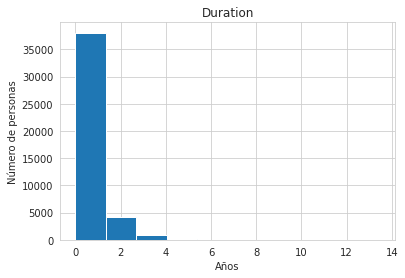

In [ ]:
plt.hist(df['years'])
plt.xlabel("Años")
plt.ylabel("Número de personas")
plt.title("Duration")
plt.show()

En esta gráfica vemos que sin ninguna duda la mayoría de las personas que hacen uso de esta sucursal llevan en la empresa menos de un año, lo vemos en la columna entre 0 y 1, que visiblemente es muchísimo mayor que las demás.
Y después de el primer año, los clientes han disminuido notablemente, y así sucesivamente, hay muy muy poca gente que lleva en la empresa entre 3 y 4 años.

Sin embargo, también debe haber personas que hayan estado haciendo uso de esta sucursal más de 6, 8 y 10 años ya que en la gráfica en el eje vemos estos números. No vemos una barra porque igual es tán poca la representación que al lado de la columna 1 que no somos capaces de verlo. 

Por esto mismo vamos a usar otro diagrama, para ver si de esta manera somos capaces de mirar mejor los datos y la cantidad de perosnas que llevan más tiempo en el banco.

Para ellos vamos a redondear los datos a los números enteros, por ejemplo siuna persona lleva menos de un años el número que aparece será 0.

<ipython-input-39-d5665fda2b07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['yearsinteger'][i] = math.floor(df['years'][i])


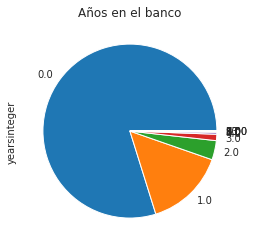

In [ ]:
import math
df['yearsinteger'] = np.nan
for i in range (len(df)):
  df['yearsinteger'][i] = math.floor(df['years'][i])
df['yearsinteger'].value_counts().plot(kind='pie', title='Años en el banco')

##Evaluación

En esta nueva gráfica se reconfirma la conclusión que habíamos sacado de la anterior, la gan mayoría de las personas que hacen uso de esta sucursal llevan menos de un año en el banco, pero sin emabrgo en esta gráfica se puede observar mejor que hay gente que lleva 2 años, 3 años, y claramente se ve que hay más categorías que no conseguimos ver porque la representación es muy pequeña.

Para poder ver todos los clientes cuanto tiempo llevan haciendo uso de esta sucursal vamos a ver contar las personas que llevan menos de un año, menos de dos, menos de tres... Y a ver a cuantos años llegamos y a ver la cantidad de personas que llevan estos años.

In [ ]:
df['yearsinteger'].value_counts()

0.0     34604
1.0      6437
2.0      1550
3.0       510
4.0       157
5.0        58
6.0        16
8.0         8
7.0         8
9.0         3
10.0        2
13.0        1
Name: yearsinteger, dtype: int64

Haciendo un count de nuestra nueva variable vemos exactamente las personas que llevan X años en la empresa, vemos que ha crecido exponencialemnte esta sucursal que según pasaban los años más clientes se unian a ella.

Por último, observamos que la mayoría de los clientes de esta sucursal llevan en ella un año, con una diferencia abismal. Esto puede ser por que han empezado a publiciatar esta sucursal, se ha hecho más popular, ha sacado alguna campaña, en definitiva, algo que capta a los clientes a ir a este banco y especificamente a esta sucursal.

## Despliegue



Como hemos dicho, la sucursal ha tenido un avance exponencial, crece con los años de manera extraordinaria. Vemos que empezó con un cliente, depsues de tres años de no conseguir ninguno sumó 2 que llevan 10 años, a partir de este año, todos los años ha ido sumando clientes y cada vez más.

La subida exponencial de los clientes se puede deber a muchas cosas, campañas puclicitarias, crecimento alrededor de la zona de la sucursal, éxito del banco de la sucursal, en este caso Santander...

Pasa conseguir que la sucursal siga subiendo de clientes podemos: o seguir haciendo lo que estaban llevando a cabo (se ve que funciona) o hace más capañas publicitarias, hacer que la gente lo conozco y en concreto, la gente entre las edades que más destaca.